<a href="https://colab.research.google.com/github/MUbarak123-56/emotion-detection/blob/master/models/resnet_50_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.7 MB/s 
     |████████████████████████████████| 441 kB 83.6 MB/s 
     |████████████████████████████████| 1.3 MB 88.0 MB/s 
     |████████████████████████████████| 5.3 MB 74.5 MB/s 
     |████████████████████████████████| 1.6 MB 67.4 MB/s 
     |████████████████████████████████| 212 kB 89.3 MB/s 
     |████████████████████████████████| 115 kB 78.7 MB/s 
     |████████████████████████████████| 163 kB 72.0 MB/s 
     |████████████████████████████████| 127 kB 71.3 MB/s 
     |████████████████████████████████| 115 kB 71.3 MB/s 
     |████████████████████████████████| 7.6 MB 70.0 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# alvin's GoogleDrive path
path = Path('/content/gdrive/MyDrive/emotion-detection/data/train')

In [ ]:
# resize the image into 48x48
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms = Resize(48),
    batch_tfms=aug_transforms(size=224))

In [ ]:
dls = pic.dataloaders(path)

In [ ]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

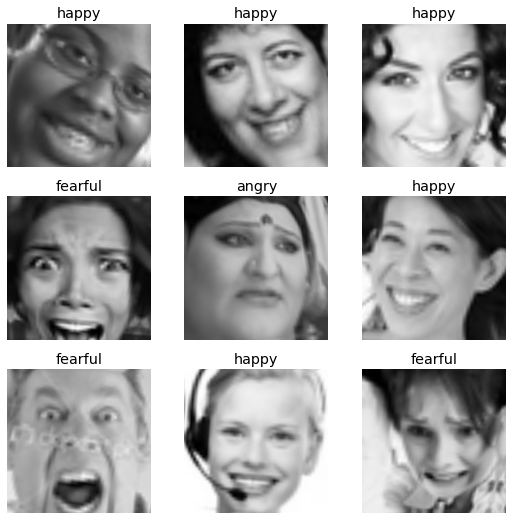

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=7.585775892948732e-05)

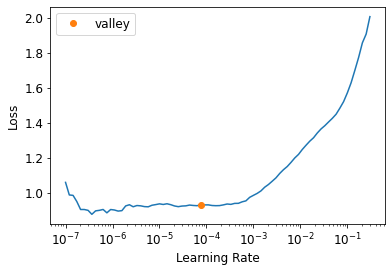

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(8, 5e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.922524,0.952278,0.358861,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.917472,0.948995,0.359392,00:47
1,0.915755,0.953707,0.360983,00:47
2,0.928865,0.949351,0.355501,00:47
3,0.900518,0.942763,0.357446,00:47
4,0.920297,0.944250,0.356031,00:47
5,0.899210,0.944580,0.359038,00:47
6,0.920202,0.944386,0.358507,00:47
7,0.898880,0.941960,0.356031,00:47


In [ ]:
interp = Interpretation.from_learner(learn)

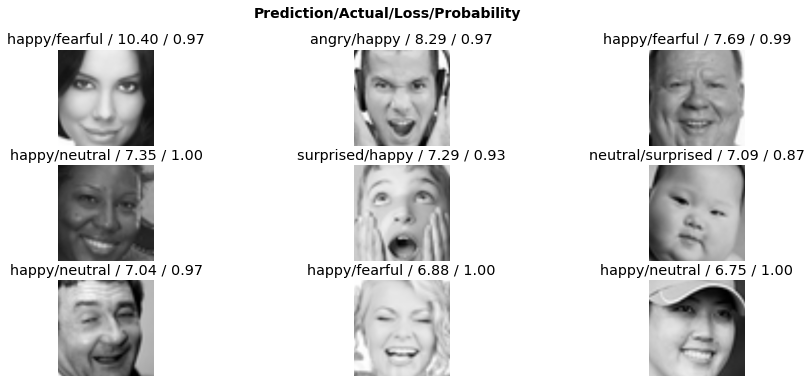

In [ ]:
interp.plot_top_losses(9, figsize = (15,6))

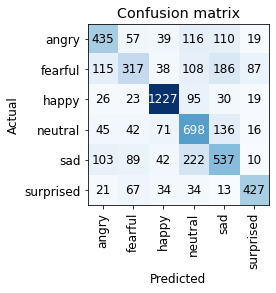

In [ ]:
interp_class = ClassificationInterpretation.from_learner(learn)
interp_class.plot_confusion_matrix()

In [ ]:
learn.export("resnet-50-8-0000005.pkl")